<a href="https://colab.research.google.com/github/ambideXtrous9/All-Regressor-on-House-Data/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
sns.set(rc={"figure.figsize":(12, 12)})

In [ ]:
path = '/content/drive/MyDrive/Juniper/Real estate.csv'

In [ ]:
df = pd.read_csv(path)

In [ ]:
df.columns = ['No','date', 'age', 'distance_metro','stores_near','lati','longit','price']


In [ ]:
df.head(10)

,No,date,age,distance_metro,stores_near,lati,longit,price
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   No              414 non-null    int64  
 1   date            414 non-null    float64
 2   age             414 non-null    float64
 3   distance_metro  414 non-null    float64
 4   stores_near     414 non-null    int64  
 5   lati            414 non-null    float64
 6   longit          414 non-null    float64
 7   price           414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [ ]:
df['date'] = df['date'].astype(int)

In [ ]:
df.isnull().sum()

No                0
date              0
age               0
distance_metro    0
stores_near       0
lati              0
longit            0
price             0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
No,414.0,207.500000,119.655756,1.00000,104.250000,207.50000,310.750000,414.00000
date,414.0,2012.695652,0.460687,2012.00000,2012.000000,2013.00000,2013.000000,2013.00000
age,414.0,17.712560,11.392485,0.00000,9.025000,16.10000,28.150000,43.80000
distance_metro,414.0,1083.885689,1262.109595,23.38284,289.324800,492.23130,1454.279000,6488.02100
stores_near,414.0,4.094203,2.945562,0.00000,1.000000,4.00000,6.000000,10.00000
lati,414.0,24.969030,0.012410,24.93207,24.963000,24.97110,24.977455,25.01459
longit,414.0,121.533361,0.015347,121.47353,121.528085,121.53863,121.543305,121.56627
price,414.0,37.980193,13.606488,7.60000,27.700000,38.45000,46.600000,117.50000


In [ ]:
x = df.drop(['price'],axis=1)
y = df['price']


In [ ]:
x.drop(['No','date'],axis=1,inplace=True)

In [ ]:
x.head(5)

,age,distance_metro,stores_near,lati,longit
0,32.0,84.87882,10,24.98298,121.54024
1,19.5,306.59470,9,24.98034,121.53951
2,13.3,561.98450,5,24.98746,121.54391
3,13.3,561.98450,5,24.98746,121.54391
4,5.0,390.56840,5,24.97937,121.54245


In [ ]:
y.head(5)

0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: price, dtype: float64

In [ ]:
df.corr().T

,No,date,age,distance_metro,stores_near,lati,longit,price
No,1.000000,0.007379,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
date,0.007379,1.000000,0.049171,0.016519,-0.005586,0.008118,0.013177,0.081545
age,-0.032808,0.049171,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
distance_metro,-0.013573,0.016519,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
stores_near,-0.012699,-0.005586,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
lati,-0.010110,0.008118,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
longit,-0.011059,0.013177,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
price,-0.028587,0.081545,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


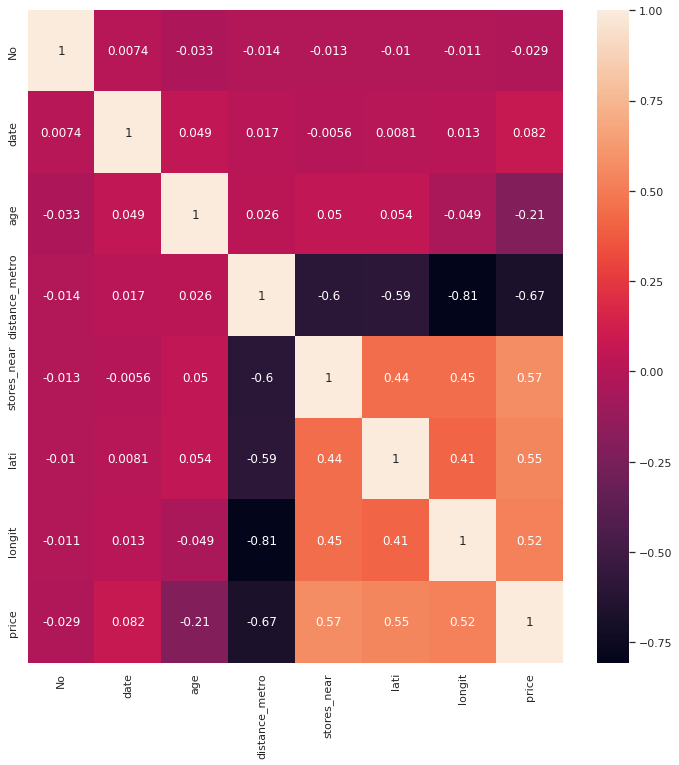

In [ ]:
ax = sns.heatmap(df.corr(), annot=True)

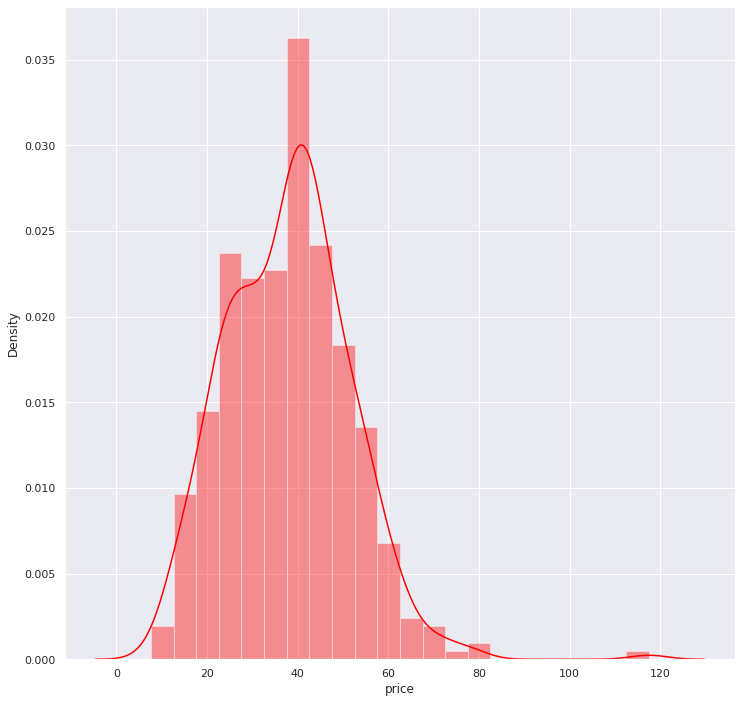

In [ ]:
sns.distplot(df['price'],color="red",kde=True)

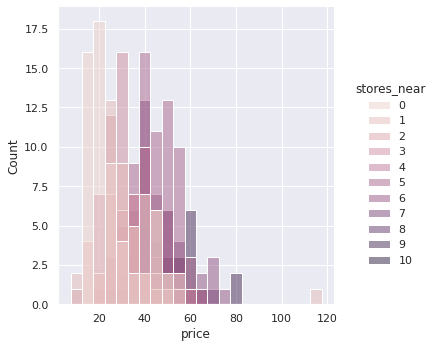

In [ ]:
sns.displot(data=df,x='price',hue='stores_near')

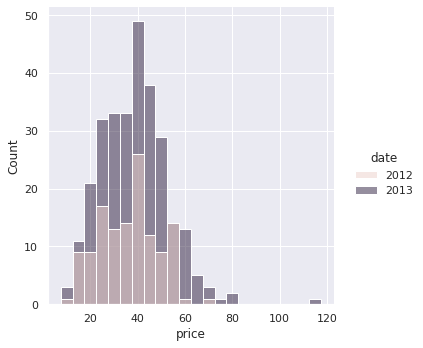

In [ ]:
sns.displot(data=df,x='price',hue='date')

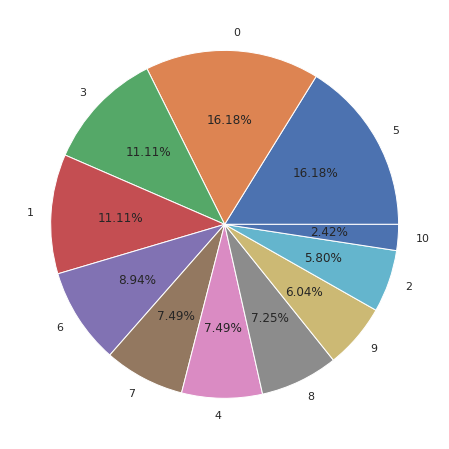

In [ ]:
species=df['stores_near'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(species.values, labels=species.index, autopct='%1.2f%%')
plt.show()

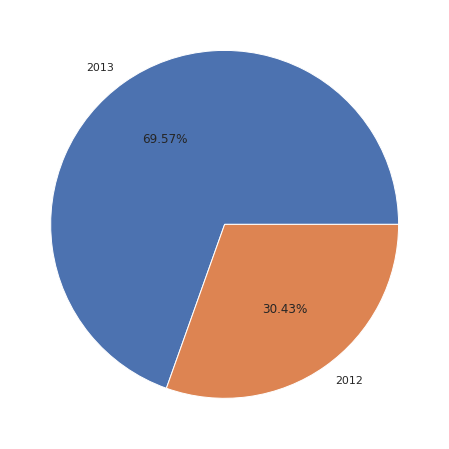

In [ ]:
species=df['date'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(species.values, labels=species.index, autopct='%1.2f%%')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

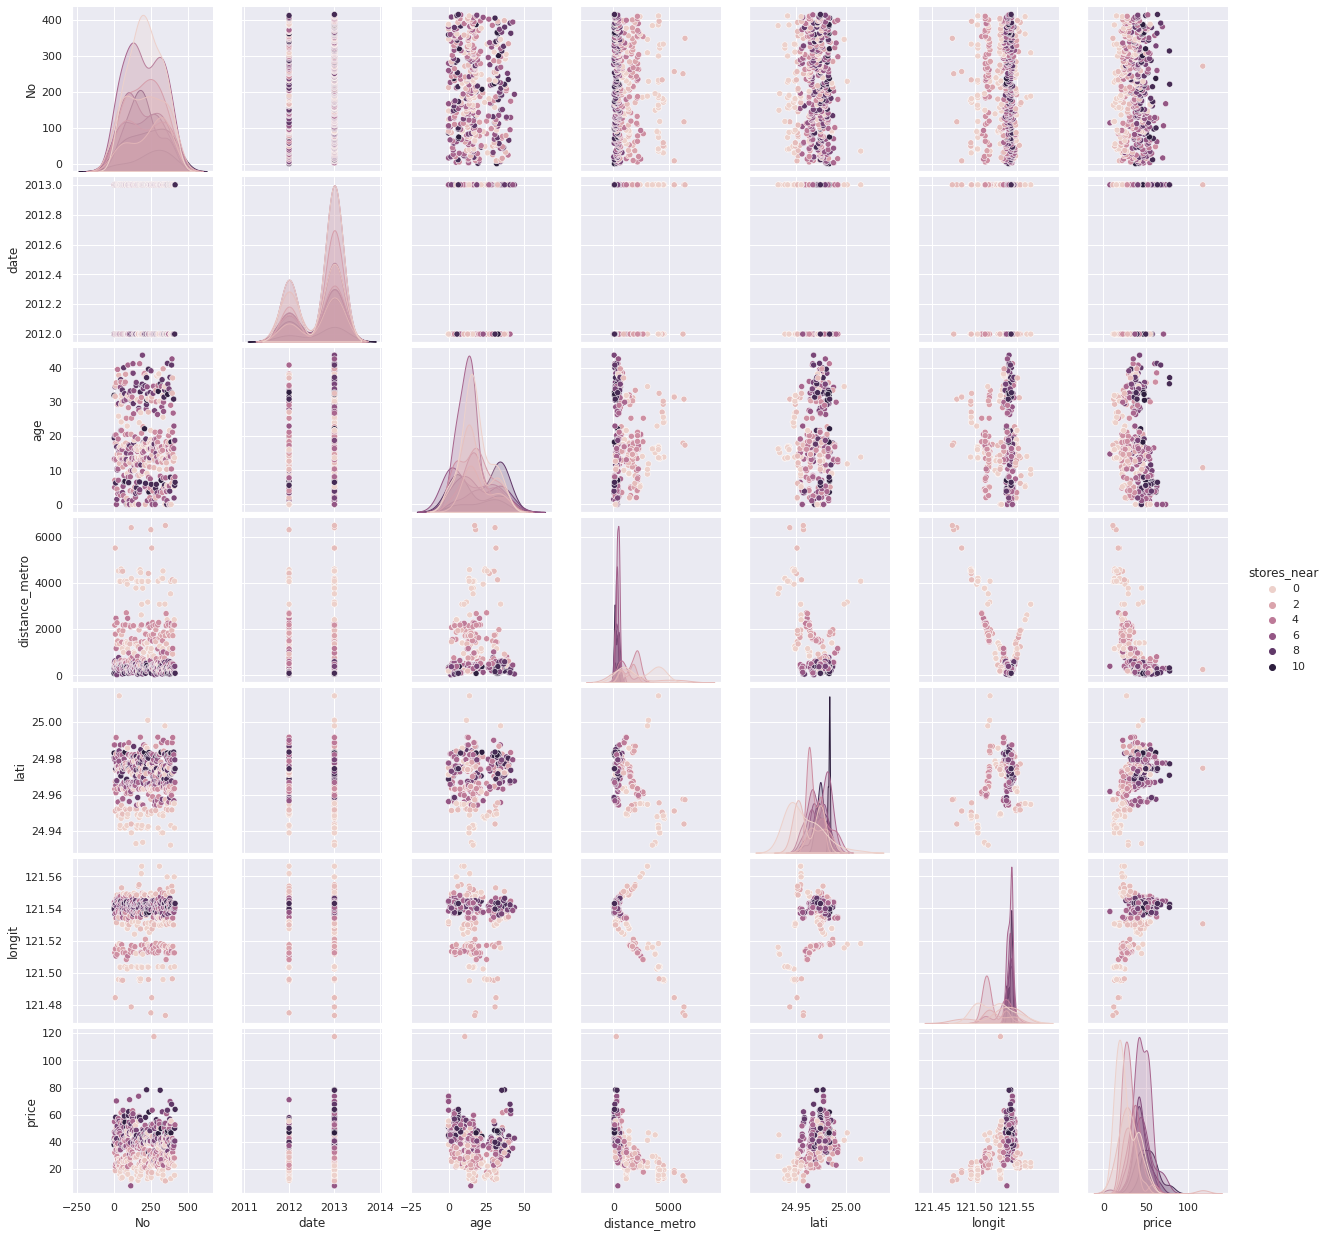

In [ ]:
g = sns.pairplot(df,hue="stores_near")

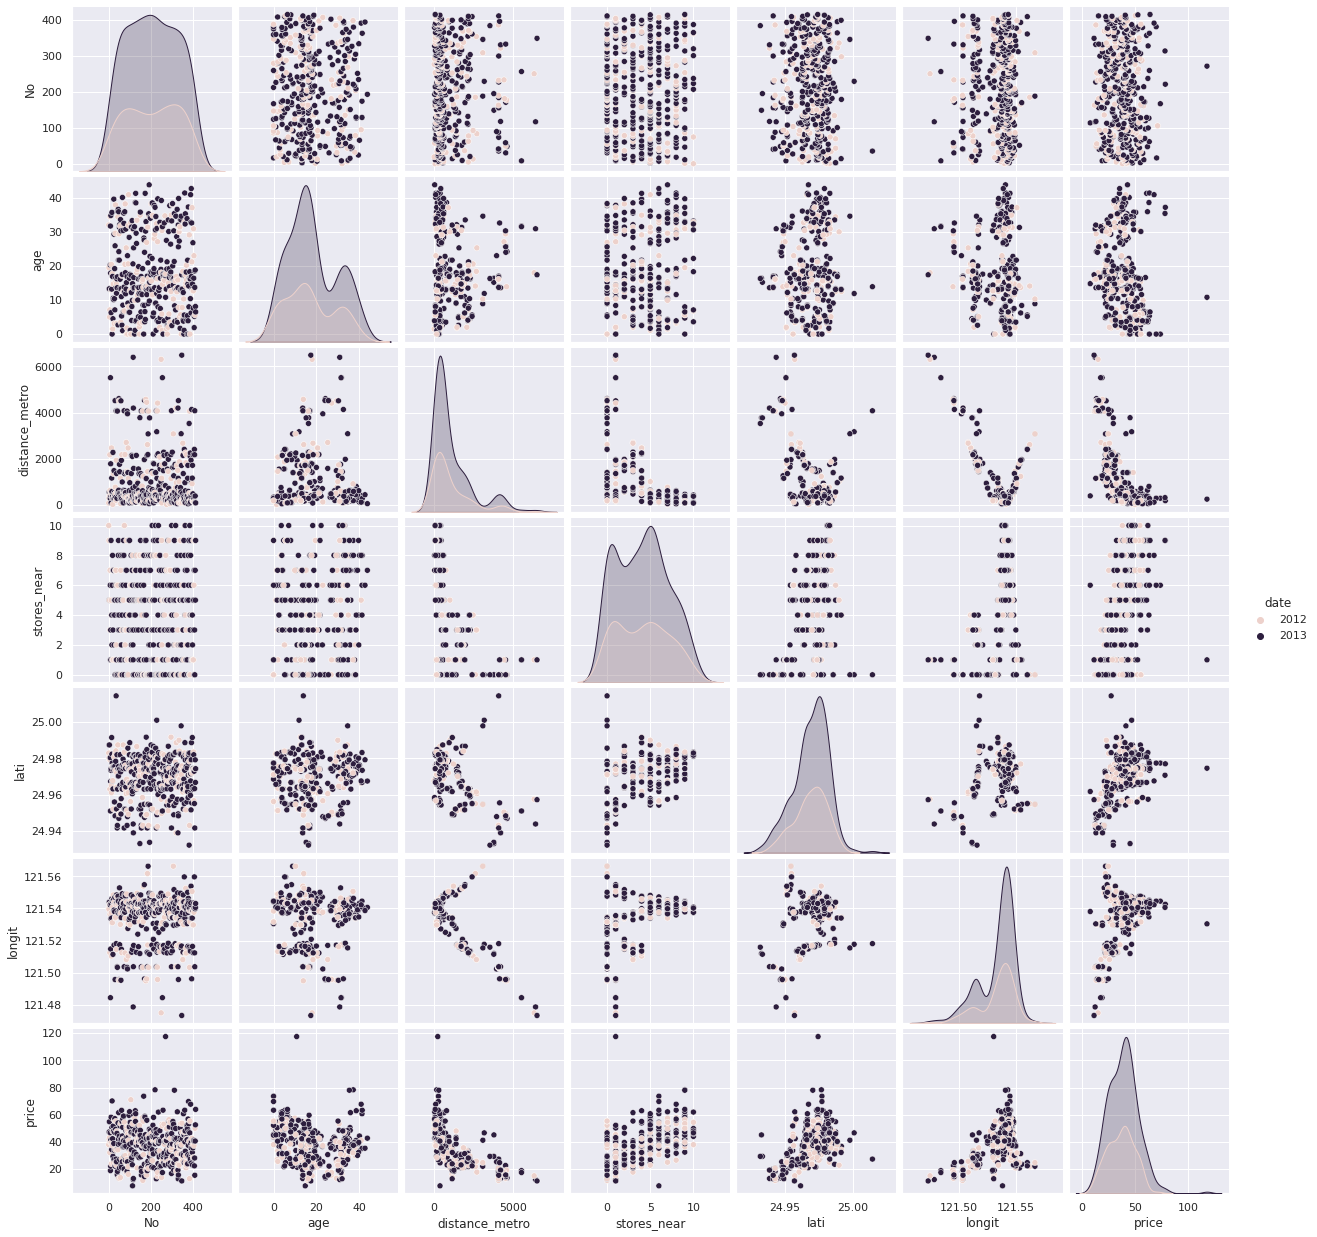

In [ ]:
g = sns.pairplot(df,hue="date")

In [ ]:
def box(var):
    sns.boxplot(x="date", y=var, data=df,palette='rainbow')

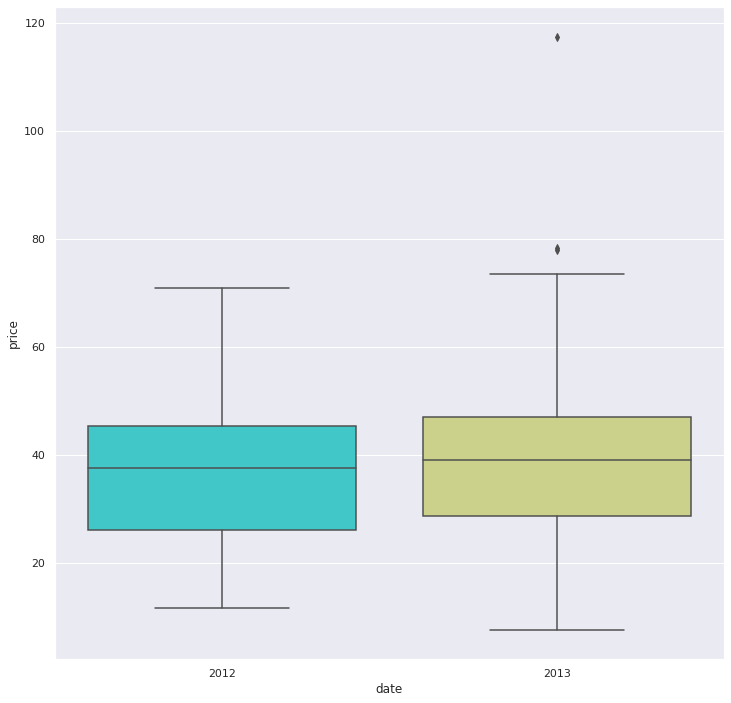

In [ ]:
box('price')

In [ ]:
def box(var):
    sns.boxplot(x="stores_near", y=var, data=df,palette='rainbow')

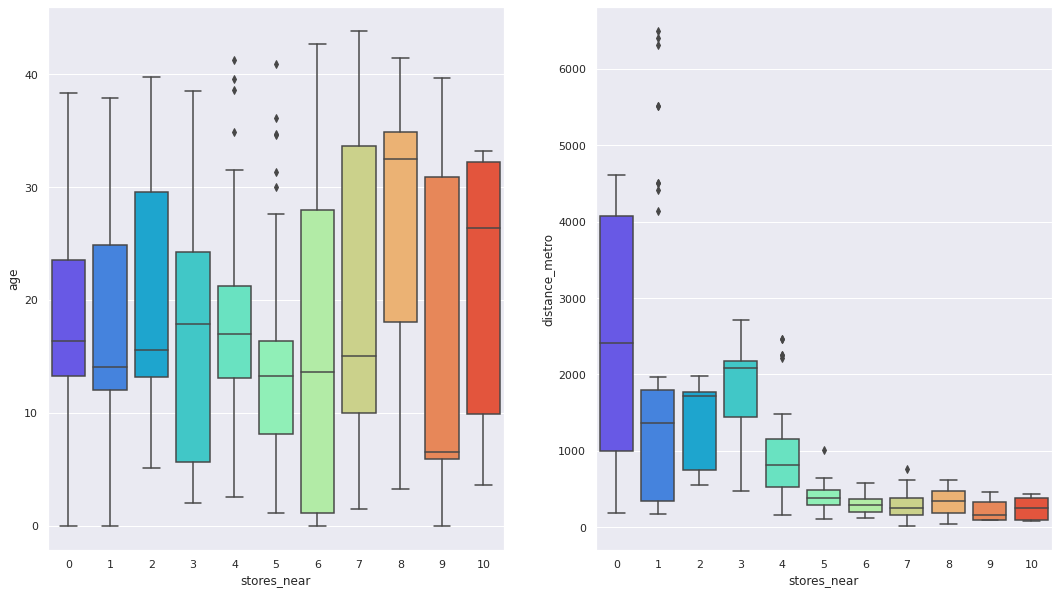

In [ ]:
fig, ax = plt.subplots(1, 2,figsize=(18,10))
plt.subplot(1,2,1)
box('age')
plt.subplot(1,2,2)
box('distance_metro')

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

# **Linear Regression**

In [ ]:
reg = LinearRegression().fit(x_train,y_train)

In [ ]:
reg.score(x_train, y_train)

0.5457883393347673

Text(0.5, 0, 'Errors')

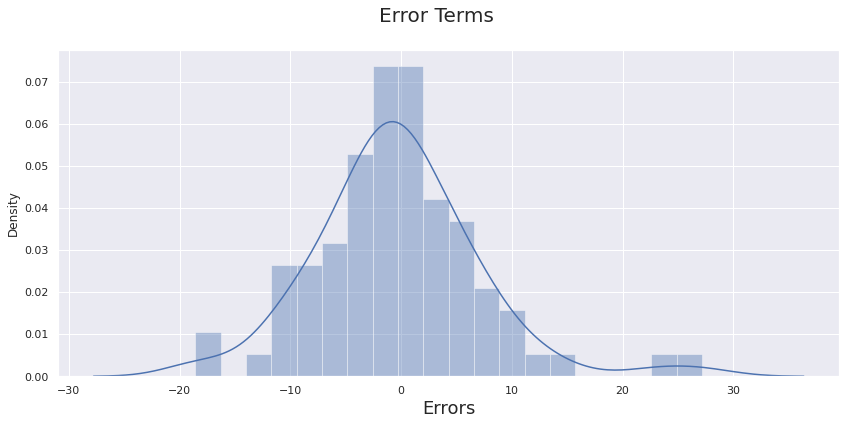

In [ ]:
y_train_price = reg.predict(x_test)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
scr = r2_score(y_test,y_train_price)

In [ ]:
scr

0.6746481382828176

# **Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
regr = RandomForestRegressor(max_depth=2, random_state=0)

In [ ]:
regr.fit(x_train,y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [ ]:
regr.score(x_train, y_train)

0.6445493129997519

Text(0.5, 0, 'Errors')

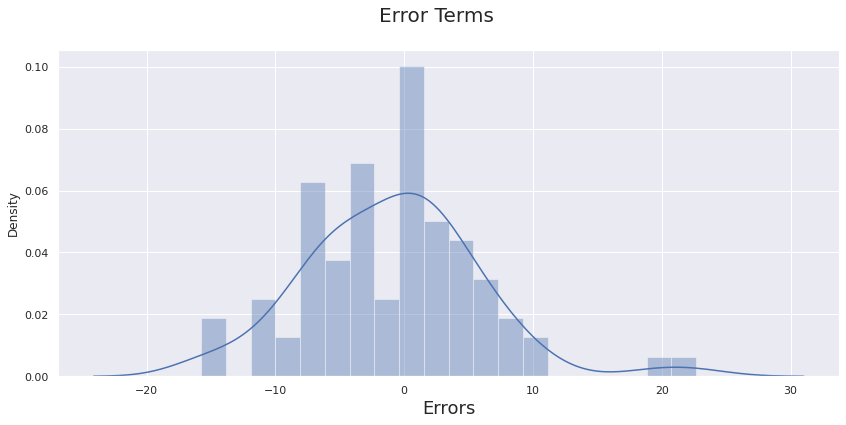

In [ ]:
y_train_price = regr.predict(x_test)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

In [ ]:
scr = r2_score(y_test,y_train_price)
print(scr)

0.7278077223660271


# **XGBRegressor**

In [ ]:
from  xgboost  import  XGBRegressor

In [ ]:
# Various hyper-parameters to tune
xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

In [ ]:
res = xgb_grid.fit(x_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


In [ ]:
res.score(x_train, y_train)

0.9588418131413522

Text(0.5, 0, 'Errors')

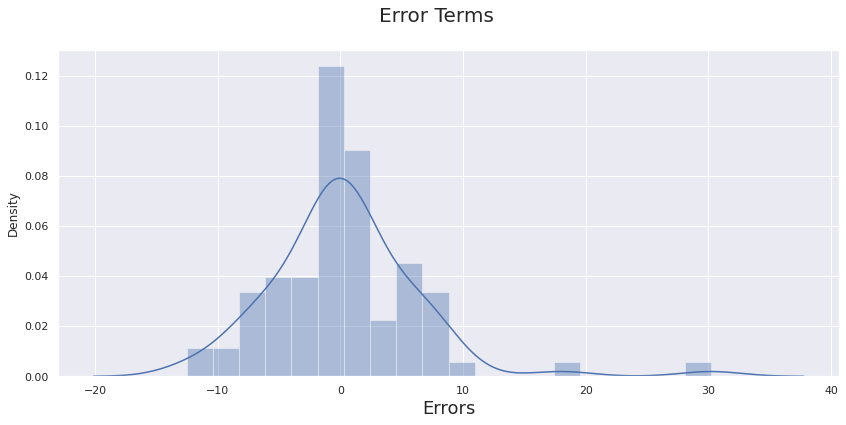

In [ ]:
y_train_price = res.predict(x_test)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

In [ ]:
scr = r2_score(y_test,y_train_price)
print(scr)

0.7791579942859493


# **SVR**

In [174]:
from sklearn.svm import SVR
regr = SVR(C=1.0, epsilon=0.2)
regr.fit(x_train,y_train)

SVR(epsilon=0.2)

In [175]:
regr.score(x_train, y_train)

0.5923660694943614

Text(0.5, 0, 'Errors')

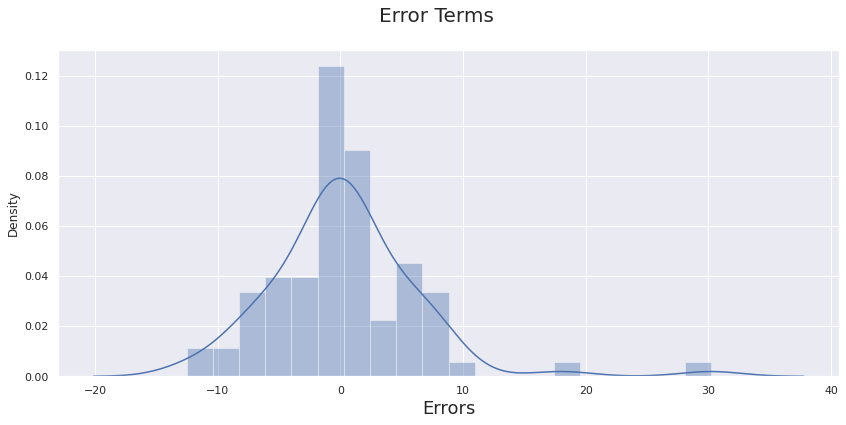

In [176]:
y_train_price = res.predict(x_test)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

In [177]:
scr = r2_score(y_test,y_train_price)
print(scr)

0.7791579942859493


# **GradientBoostingRegressor**

In [179]:
from sklearn.ensemble import GradientBoostingRegressor

In [181]:
reg = GradientBoostingRegressor()
reg.fit(x_train,y_train)

GradientBoostingRegressor()

In [182]:
reg.score(x_train, y_train)

0.9259589537837151

Text(0.5, 0, 'Errors')

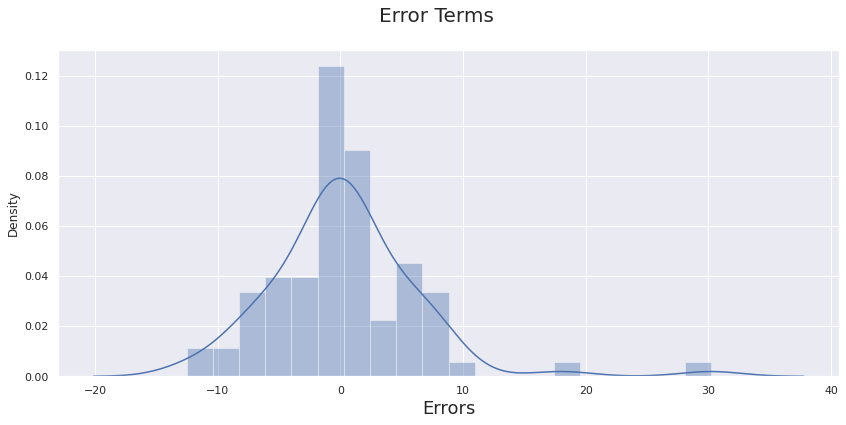

In [183]:
y_train_price = res.predict(x_test)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

In [184]:
scr = r2_score(y_test,y_train_price)
print(scr)

0.7791579942859493


# **Stacking Regressor**

In [185]:
from sklearn.ensemble import StackingRegressor

In [187]:
# Light Gradient Boosting Regressor
#lightgbm = LGBMRegressor()

# XGBoost Regressor
xgboost = XGBRegressor()



# Support Vector Regressor
svr = SVR(C= 20, epsilon= 0.008, gamma=0.0003)

# Gradient Boosting Regressor
gbr = GradientBoostingRegressor()  

# Random Forest Regressor
rf = RandomForestRegressor()

estimators = [('xg',xgboost),('sv', svr),('gb', gbr),('rf', rf)]

reg = StackingRegressor(estimators=estimators,final_estimator=rf)

reg.fit(x_train, y_train).score(x_test, y_test)

[11:33:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:33:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:33:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:33:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:33:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:33:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.721938465346633

In [188]:
scr = r2_score(y_test,reg.predict(x_test))
print(scr)

0.721938465346633
